# Lead Scoring Case Study

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.


The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.


There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.


X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [2]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [4]:
lead = pd.read_csv("C:/Users/Asus/Downloads/python/LEAD SCORING CASE STUDY/Lead Scoring Assignment/Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# inspecting the data 

lead.shape

(9240, 37)

In [5]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describing the data 

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Replacing 'Select' with NaN

lead = lead.replace('Select',np.nan)

In [8]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# checking the null values 

lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# checking the percentage of null values 

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#dropping cols with more than 45% missing values

col=lead.columns

for i in col:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 45):
        lead.drop(i, 1, inplace = True)

In [12]:
#checking null values percentage

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#checking value counts of Country column

lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

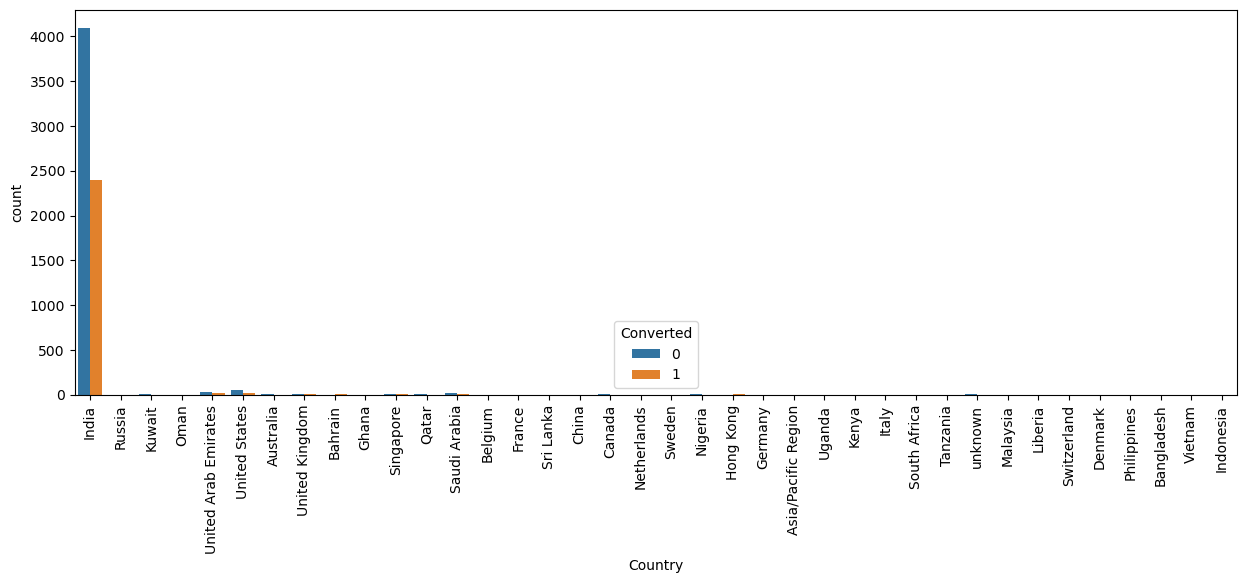

In [14]:
#plotting spread of Country columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Country, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [15]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India

lead['Country'] = lead['Country'].replace(np.nan,'India')

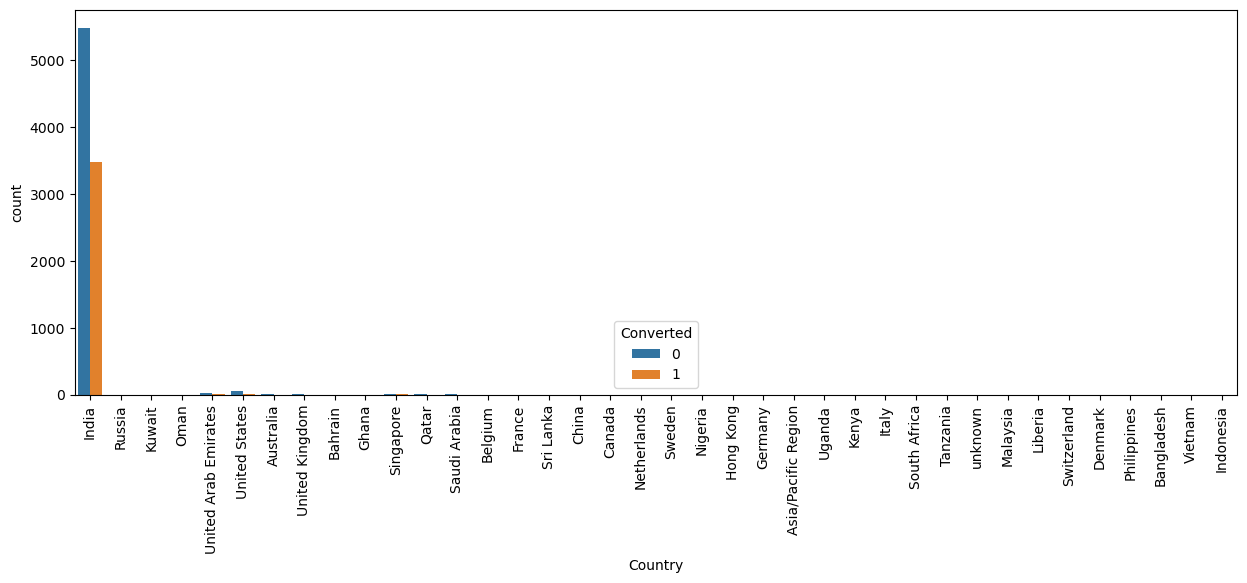

In [16]:
#plotting spread of Country columnn after replacing NaN values

plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Country, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### As we can see the Number of Values for India are quite high (nearly 97% of the Data), this column can be dropped

In [17]:
#creating a list of columns to be droppped

col_drop=['Country']

In [18]:
#checking value counts of "City" column

lead['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
lead['City'] = lead['City'].replace(np.nan,'Mumbai')

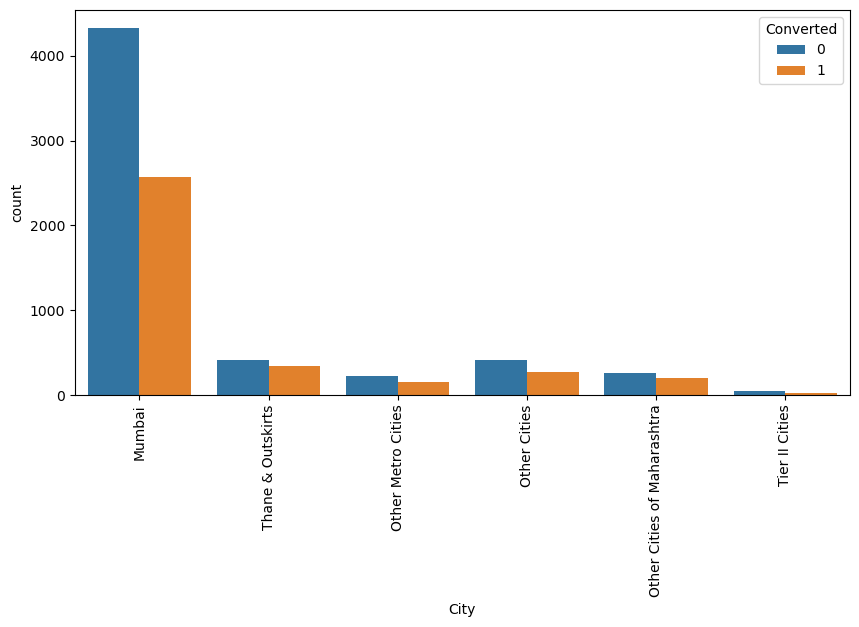

In [20]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(lead.City, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [21]:
#checking value counts of Specialization column

lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Not Specified')

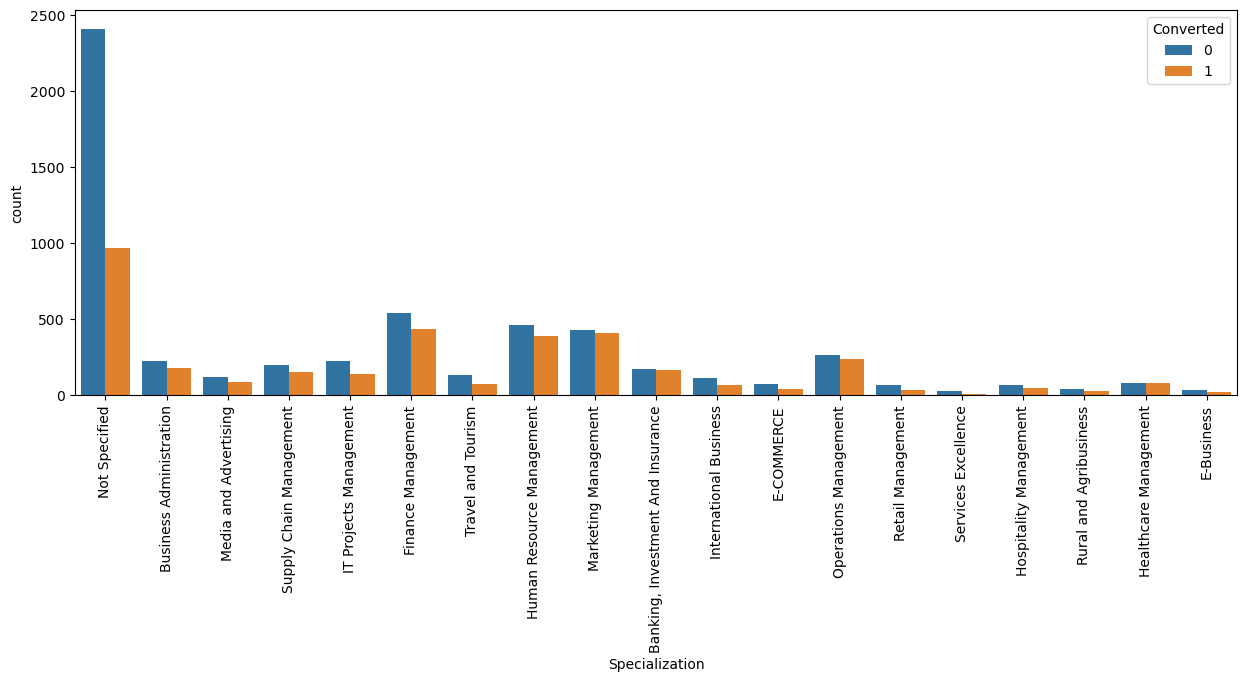

In [23]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### We see that specialization with Management in them have higher number of lead as well as lead converted. So this is definitely a significant variable and should not be dropped.

In [24]:
#combining Management Specializations because they show similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')

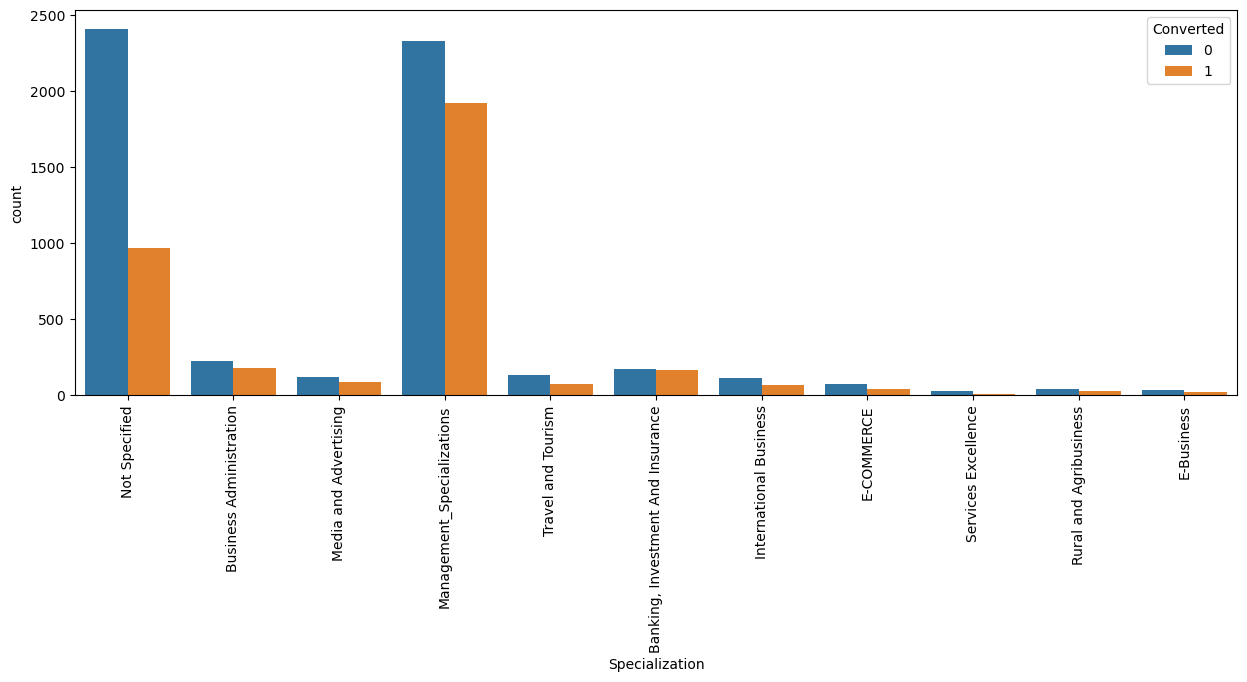

In [25]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead.Specialization, hue=lead.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [26]:
#What is your current occupation

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
#imputing Nan values with mode "Unemployed"

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

In [28]:
#checking value count

lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

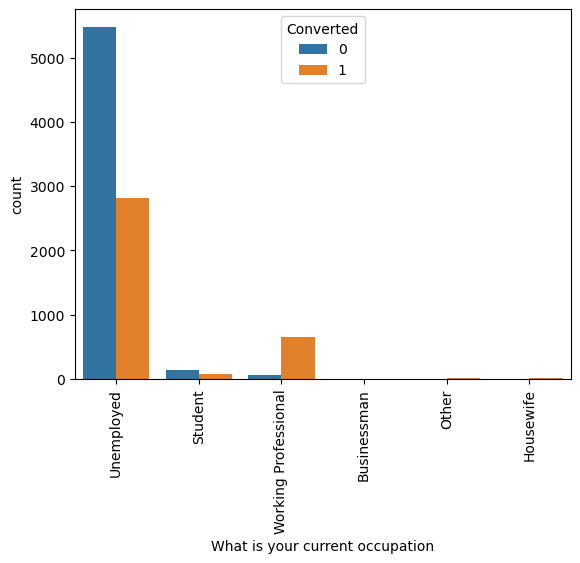

In [29]:
#visualizing Variable count based on Converted value

m1=sns.countplot(lead['What is your current occupation'], hue=lead.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.show()

- Working Professionals going for the course have high chances of joining.

- Unemployed lead are the most in terms of Absolute numbers.

In [30]:
#checking value counts

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
#replacing Nan values with Mode "Better Career Prospects"

lead['What matters most to you in choosing a course'] = lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

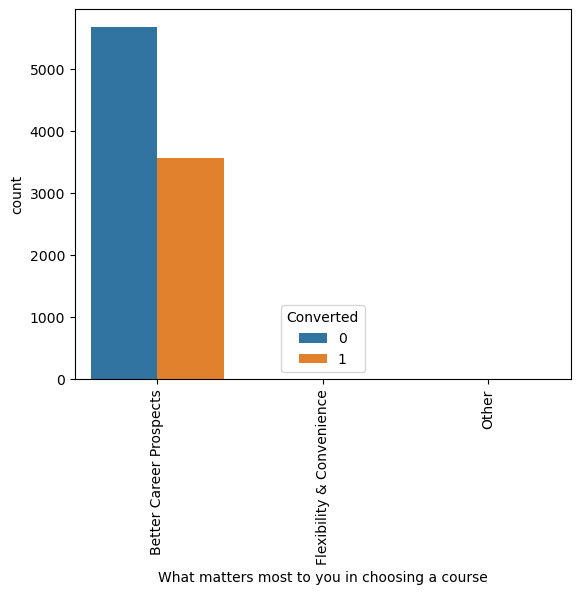

In [32]:
#visualizing Variable count based on Converted value

m1=sns.countplot(lead['What matters most to you in choosing a course'], hue=lead.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.show()

In [33]:
#checking value counts of variable

lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
#Here again we have another Column that is worth Dropping. So we Append to the cols_to_drop List

col_drop.append('What matters most to you in choosing a course')
col_drop

['Country', 'What matters most to you in choosing a course']

In [35]:
#checking value counts of Tag variable

lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [36]:
#replacing Nan values with "Not Specified"

lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')

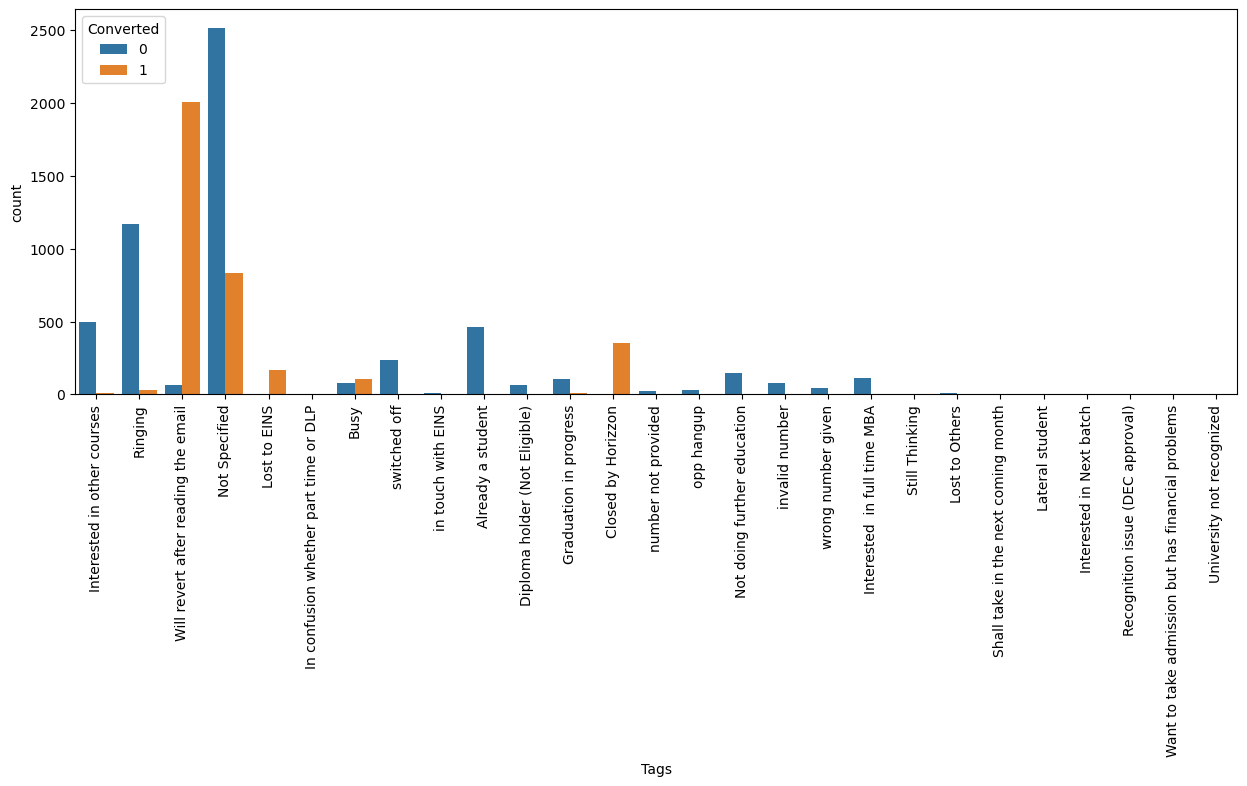

In [37]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
m1=sns.countplot(lead['Tags'], hue=lead.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
# replacing tags with low frequency with "Other Tags"

lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

lead['Tags'] = lead['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [39]:
#checking percentage of missing values

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [40]:
#checking value counts of Lead Source column

lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [41]:
#replacing Nan Values and combining low frequency values
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace('Facebook','Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

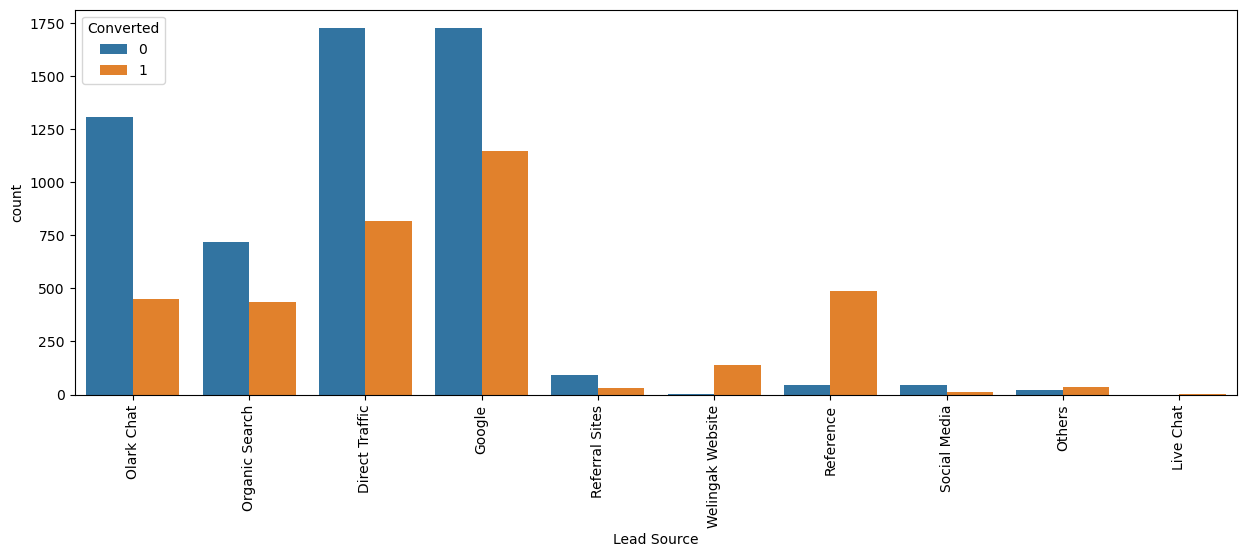

In [42]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,5))
m1=sns.countplot(lead['Lead Source'], hue=lead.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.show()

Inference

- Maximum number of leads are generated by Google and Direct traffic.

- Conversion Rate of reference leads and leads through welingak website is high.

- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [43]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [44]:
 #replacing Nan Values and combining low frequency values

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')
lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [45]:
# Last Activity:

lead['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

In [46]:
#Check the Null Values in All Columns:

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [47]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model

lead = lead.dropna()

In [48]:
#Checking percentage of Null Values in All Columns:

round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [49]:
#Lead Origin

lead['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

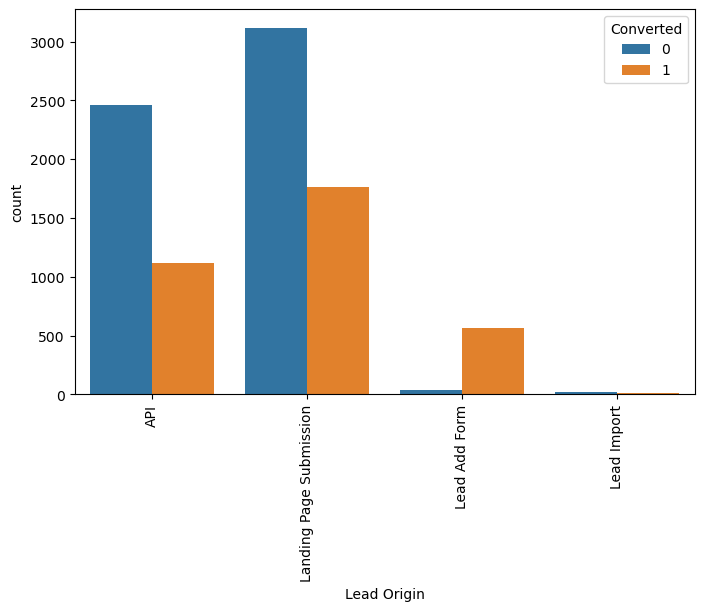

In [50]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(8,5))
m1=sns.countplot(lead['Lead Origin'], hue=lead.Converted)
m1.set_xticklabels(m1.get_xticklabels(),rotation=90)
plt.show()

Inference

API and Landing Page Submission bring higher number of lead as well as conversion.

Lead Add Form has a very high conversion rate but count of lead are not very high.

Lead Import and Quick Add Form get very few lead.

In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more lead from Lead Add Form

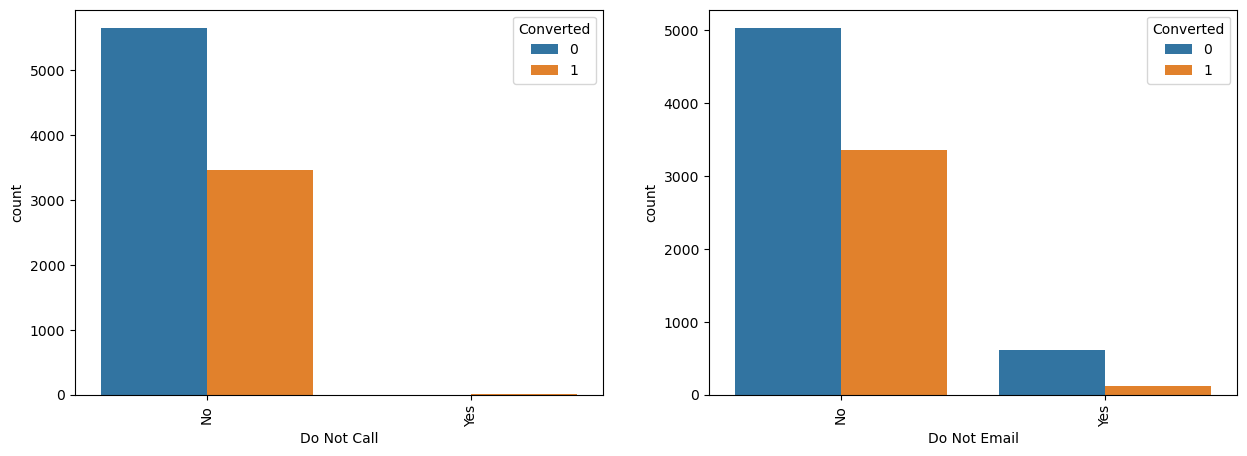

In [51]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(lead['Do Not Call'], hue=lead.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(lead['Do Not Email'], hue=lead.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [52]:
#checking value counts for Do Not Call

lead['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [53]:
#checking value counts for Do Not Email

lead['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [54]:
col_drop.append('Do Not Call')
col_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

Imbalanced columns that can be dropped
- Search
- Magazine
- Newspaper article
- X Education Forums
- Newspaper
- Digital Advertisement
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [55]:
lead.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [56]:
lead.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [57]:
lead['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [58]:
lead['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [59]:
lead['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [60]:
lead['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [61]:
lead['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [62]:
lead['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [63]:
lead['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [64]:
lead['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [65]:
lead['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [66]:
#adding imbalanced columns to the list of columns to be dropped

col_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [67]:
#checking value counts of last Notable Activity

lead['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [68]:
#clubbing lower frequency values

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [69]:
#dropping columns

lead = lead.drop(col_drop,1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  Specialization                          9103 non-null   obje

# Numerical analysis

In [70]:
# checking % of data 

Converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

38.02043282434362

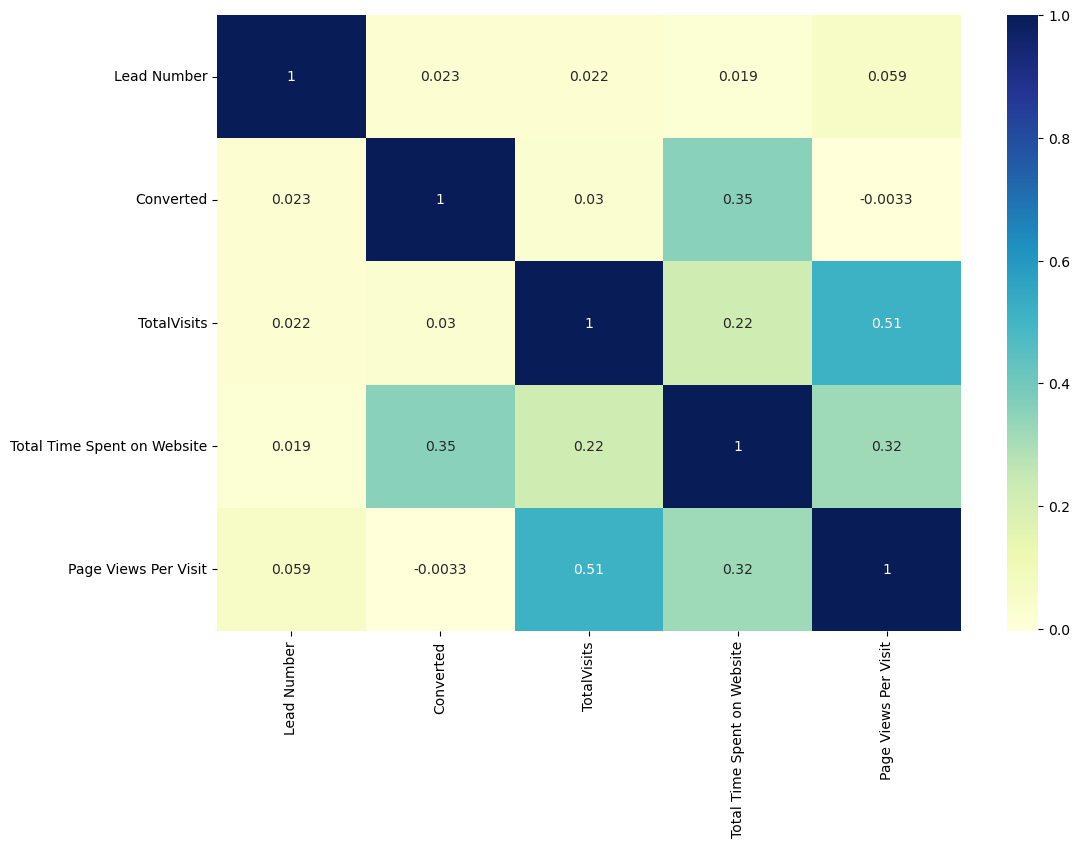

In [71]:
# checking correlations 

plt.figure(figsize=(12,8))
sns.heatmap(lead.corr(), cmap="YlGnBu", annot=True)
plt.show()

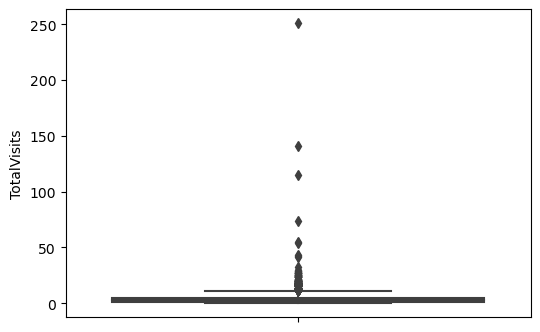

In [72]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [73]:
#checking percentile values for "Total Visits"

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

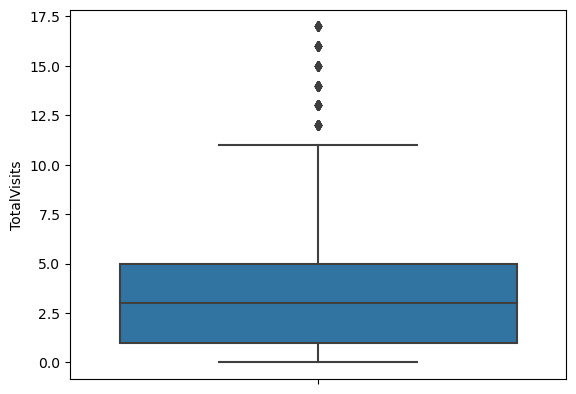

In [74]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead.TotalVisits.quantile(0.99)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]
sns.boxplot(y=lead['TotalVisits'])
plt.show()

In [79]:
lead.drop(['Prospect ID','Lead Number'], axis =1 , inplace = True)

In [80]:
lead.shape

(9020, 14)

In [81]:
#checking percentiles for "Total Time Spent on Website"

lead['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

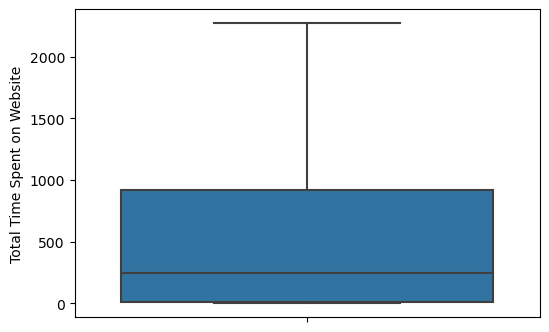

In [82]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Total Time Spent on Website'])
plt.show()

Here, we don't have any otliers therefore no treatment is required.

In [83]:
#checking spread of "Page Views Per Visit"

lead['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

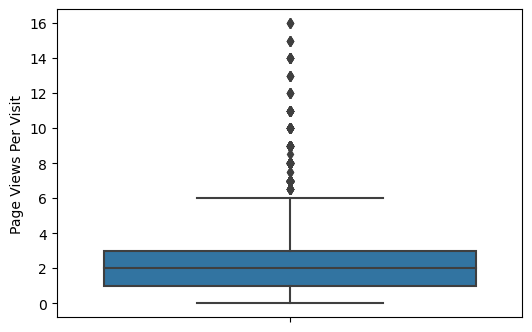

In [84]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

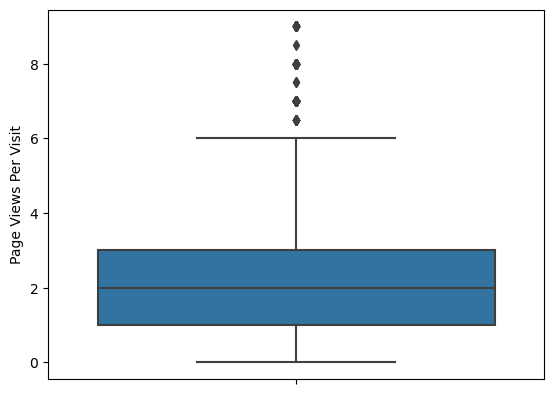

In [86]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead['Page Views Per Visit'] <= Q3]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[lead['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead['Page Views Per Visit'])
plt.show()

In [87]:
lead.shape

(8953, 14)

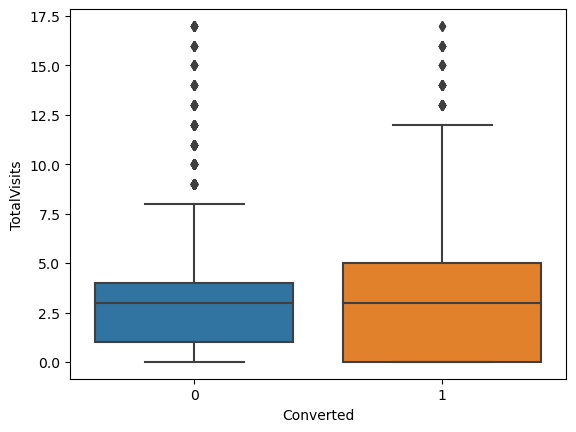

In [88]:
#checking Spread of "Total Visits" vs Converted variable

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead)
plt.show()

- Meadian for converted and non converted are close.

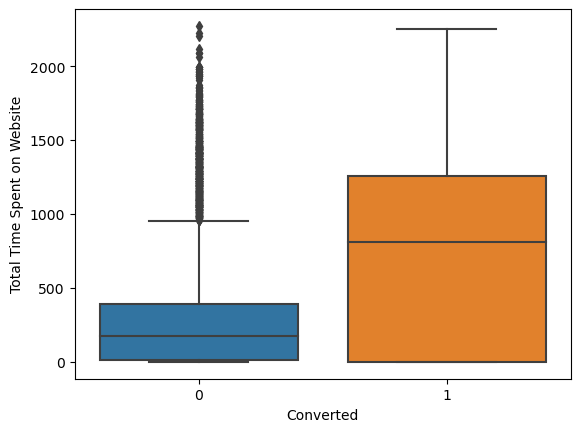

In [89]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead.Converted, y=lead['Total Time Spent on Website'])
plt.show()

- Leads spending more time on the website are more likely to be converted.

- Website should be made more engaging.


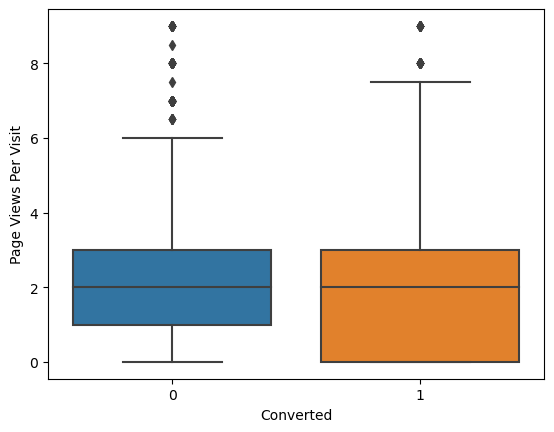

In [90]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead.Converted,y=lead['Page Views Per Visit'])
plt.show()

-  Meadian for both is same.


In [91]:
#checking missing values in leftover columns

round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

No missing values are left to analyze further.

#### Creation of Dummy Variables 

In [92]:
#getting a list of categorical columns

category_col= lead.select_dtypes(include=['object']).columns
category_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [93]:
# List of variables to map

var_list =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_list(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead[var_list] = lead[var_list].apply(binary_list)

In [94]:
#getting dummies and dropping the first column and merging the results to the master dataframe

status = pd.get_dummies(lead[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)

leads= pd.concat([lead,status],1)

In [97]:
status = pd.get_dummies(lead['Specialization'], prefix  = 'Specialization')
status = status.drop(['Specialization_Not Specified'], 1)
lead = pd.concat([lead, status], axis = 1)

In [98]:
status = pd.get_dummies(lead['Lead Source'], prefix  = 'Lead Source')
status = status.drop(['Lead Source_Others'], 1)
lead = pd.concat([lead, status], axis = 1)

In [99]:
status = pd.get_dummies(lead['Last Activity'], prefix  = 'Last Activity')
status = status.drop(['Last Activity_Others'], 1)
lead = pd.concat([lead, status], axis = 1)

In [100]:
status = pd.get_dummies(lead['Last Notable Activity'], prefix  = 'Last Notable Activity')
status = status.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead = pd.concat([lead, status], axis = 1)

In [101]:
status = pd.get_dummies(lead['Tags'], prefix  = 'Tags')
status = status.drop(['Tags_Not Specified'], 1)
lead = pd.concat([lead, status], axis = 1)

In [102]:
#dropping the original columns after dummy variable creation

lead.drop(category_col,1,inplace = True)

In [103]:
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Splitting the data 

In [104]:
# importing necessary libraries

from sklearn.model_selection import train_test_split

In [105]:
# Putting response variable to y
y = lead['Converted']

X = lead.drop('Converted', axis=1)

In [106]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, test_size=0.30, random_state=100)

In [107]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6267 non-null   float64
 1   Total Time Spent on Website                       6267 non-null   int64  
 2   Page Views Per Visit                              6267 non-null   float64
 3   Specialization_Banking, Investment And Insurance  6267 non-null   uint8  
 4   Specialization_Business Administration            6267 non-null   uint8  
 5   Specialization_E-Business                         6267 non-null   uint8  
 6   Specialization_E-COMMERCE                         6267 non-null   uint8  
 7   Specialization_International Business             6267 non-null   uint8  
 8   Specialization_Management_Specializations         6267 non-null   uint8  
 9   Specialization_M

### Scalling 

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
scaler = StandardScaler()

num_col=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_col] = scaler.fit_transform(X_train[num_col])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
9196,0.668862,1.848117,1.455819,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4696,-0.030697,-0.037832,0.399961,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3274,0.319082,-0.642138,-0.127967,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building

In [112]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [113]:
lr = LogisticRegression()

##### RFE 

In [115]:
# running RFE with 15 variables as output

rfe = RFE(lr, n_features_to_select = 15)            
rfe = rfe.fit(X_train, y_train)

In [116]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True, False,  True, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False,  True,  True,  True,  True,  True,  True])

In [117]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 24),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Specialization_Banking, Investment And Insurance', False, 26),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 25),
 ('Specialization_E-COMMERCE', False, 28),
 ('Specialization_International Business', False, 19),
 ('Specialization_Management_Specializations', False, 20),
 ('Specialization_Media and Advertising', False, 22),
 ('Specialization_Rural and Agribusiness', False, 17),
 ('Specialization_Services Excellence', False, 27),
 ('Specialization_Travel and Tourism', False, 6),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_Olark Chat', False, 15),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 14),
 ('Lead Source_Welingak Website', True

In [118]:
#list of RFE supported columns

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [119]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Act

In [120]:
# BUILDING MODEL

X_train_sm = sm.add_constant(X_train[col])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.1
Date:                Thu, 13 Apr 2023   Deviance:                       2488.2
Time:                        09:41:09   Pearson chi2:                 8.58e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6061
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5421      0.118     -4.589      0.000      -0.774      -0.311
Total Time Spent on Website                  1.0896      0.061     17.903      0.000       0.970       1.209
Lead Source_Direct Traffic                  -1.8720      0.173    -10.821      0.000      -2.211      -1.533
Lead Source_Google                          -1.2617      0.156     -8.074      0.000      -1.568      -0.955
Lead Source_Organic Search                  -1.3519      0.198     -6.842      0.000      -1.739      -0.965
Lead Source_Referral Sites                  -1.4716      0.491     -2.997      0.003      -2.434      -0.509
Lead Source_Welingak Website                 5.0582      1.025      4.933      0.000       3.049       7.068
Last Activity_Email Bounced                 -1.5891      0.451     -3.527      0.000      -2.472      -0.706
Last Activity_Olark Chat Conversation       -1.7941      0.236     -7.608      0.000      -2.256      -1.332
Last Notable Activity_SMS Sent               2.5172      0.128     19.707      0.000       2.267       2.768
Tags_Closed by Horizzon                      6.8818      1.011      6.804      0.000       4.899       8.864
Tags_Interested in other courses            -2.3990      0.403     -5.950      0.000      -3.189      -1.609
Tags_Lost to EINS                            5.4682      0.615      8.885      0.000       4.262       6.674
Tags_Other_Tags                             -2.3767      0.212    -11.226      0.000      -2.792      -1.962
Tags_Ringing                                -3.4987      0.244    -14.359      0.000      -3.976      -3.021
Tags_Will revert after reading the email     4.5357      0.180     25.202      0.000       4.183       4.888
============================================================================================================
"""

Since, all p-values are less than 0.05 , we should check the VIF values now.

#### VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Direct Traffic,1.62
2,Lead Source_Google,1.57
14,Tags_Will revert after reading the email,1.53
8,Last Notable Activity_SMS Sent,1.47
12,Tags_Other_Tags,1.38
13,Tags_Ringing,1.36
3,Lead Source_Organic Search,1.24
0,Total Time Spent on Website,1.23
10,Tags_Interested in other courses,1.15
7,Last Activity_Olark Chat Conversation,1.10


All the values seems to be in order , lets move to derive predictions on train data.

In [124]:
# Getting the Predicted values on the train set

y_train_pred = result.predict(X_train_sm)
y_train_pred[:10]

9196    0.316126
4696    0.031165
3274    0.503425
2164    0.002096
1667    0.983746
7024    0.183560
8018    0.036037
778     0.068904
6942    0.003459
4440    0.058658
dtype: float64

In [125]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.31612568, 0.03116461, 0.5034252 , 0.00209644, 0.98374554,
       0.18356046, 0.03603719, 0.068904  , 0.0034593 , 0.05865761])

In [126]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.316126,9196
1,0,0.031165,4696
2,0,0.503425,3274
3,0,0.002096,2164
4,1,0.983746,1667


In [127]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.316126,9196,0
1,0,0.031165,4696,0
2,0,0.503425,3274,1
3,0,0.002096,2164,0
4,1,0.983746,1667,1


In [128]:
from sklearn import metrics

In [129]:
# Confusion matrix 

cf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(cf)

[[3723  159]
 [ 300 2085]]


In [130]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9267592149353758


In [131]:
TP = cf[1,1] # true positive 
TN = cf[0,0] # true negatives
FP = cf[0,1] # false positives
FN = cf[1,0] # false negatives

In [132]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8742138364779874

In [133]:
# Let us calculate specificity

TN / float(TN+FP)

0.9590417310664606

In [134]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.04095826893353941


In [135]:
# positive predictive value 

print (TP / float(TP+FP))

0.929144385026738


In [136]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9254287844891872


In [137]:
# plotting thr ROC curve

def roc_cur( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

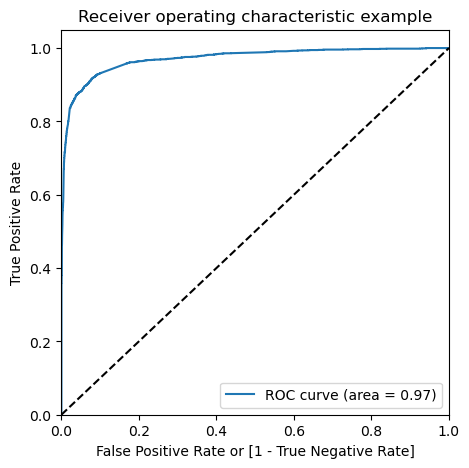

In [140]:
roc_cur(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

We are getting a good value of 0.97 indicating a good predictive model.

In [142]:
# Let's create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.316126,9196,0,1,1,1,1,0,0,0,0,0,0
1,0,0.031165,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.503425,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.002096,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.983746,1667,1,1,1,1,1,1,1,1,1,1,1


In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm_1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    
    speci = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensi = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.847295  0.967296  0.773570
0.2   0.2  0.912239  0.930398  0.901082
0.3   0.3  0.919260  0.913627  0.922720
0.4   0.4  0.923249  0.893082  0.941783
0.5   0.5  0.926759  0.874214  0.959042
0.6   0.6  0.925961  0.853669  0.970376
0.7   0.7  0.924047  0.838574  0.976558
0.8   0.8  0.907292  0.781132  0.984802
0.9   0.9  0.886868  0.717820  0.990726


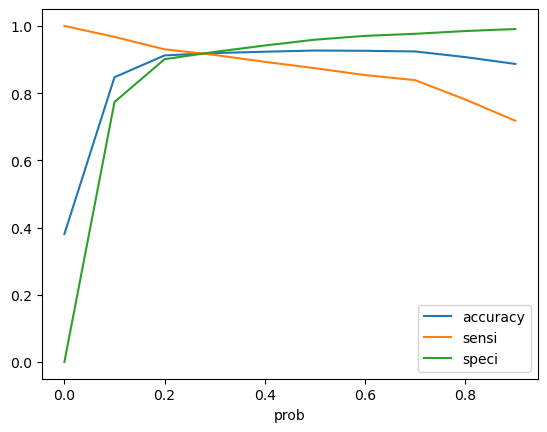

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
# From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.316126,9196,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.031165,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.503425,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.002096,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.983746,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [152]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.316126,9196,1,32
1,0,0.031165,4696,0,3
2,0,0.503425,3274,1,50
3,0,0.002096,2164,0,0
4,1,0.983746,1667,1,98


In [153]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9192596138503271

In [154]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2


array([[3582,  300],
       [ 206, 2179]])

In [156]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9136268343815513

In [158]:
# Let us calculate specificity

TN / float(TN+FP)

0.9227202472952086

### Observation

The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:

Accuracy : 92.29%
Sensitivity : 91.70%
Specificity : 92.66%

In [159]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert

print(FP/ float(TN+FP))

0.07727975270479134


In [160]:
# Positive predictive value 

print (TP / float(TP+FP))

0.8789834610730133


In [161]:
# Negative predictive value

print (TN / float(TN+ FN))

0.9456177402323126


In [162]:
#Looking at the confusion matrix again

cf = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
cf

array([[3582,  300],
       [ 206, 2179]])

In [163]:
# Precision
TP / TP + FP

cf[1,1]/(cf[0,1]+cf[1,1])

0.8789834610730133

In [164]:
# Recall
TP / TP + FN

cf[1,1]/(cf[1,0]+cf[1,1])

0.9136268343815513

In [165]:
from sklearn.metrics import precision_score, recall_score

In [166]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8789834610730133

In [167]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9136268343815513

In [168]:
from sklearn.metrics import precision_recall_curve

In [169]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

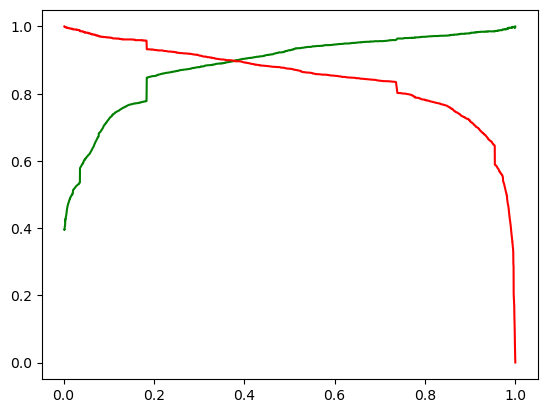

In [170]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Scaling the test set

In [171]:
num_col=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_col] = scaler.fit_transform(X_test[num_col])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,0.575687,-0.311318,0.092860,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6915,0.242505,-0.628665,-0.170849,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7681,-0.311318,1,0,0,0,0,0,0,1,0,0,0,0,1,0
984,-0.550262,0,0,1,0,0,0,0,0,0,0,0,1,0,0
8135,0.812462,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6915,-0.628665,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2712,-0.421456,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [173]:
# adding a constant

X_test_sm = sm.add_constant(X_test)

# Predictions on Test set

In [174]:
y_test_pred = result.predict(X_test_sm)

In [175]:
y_test_pred[:10]

7681    0.023321
984     0.007613
8135    0.728758
6915    0.002504
2712    0.906586
244     0.005730
4698    0.006339
8287    0.035299
6791    0.969301
8970    0.010776
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [177]:
y_pred_1.head()

,0
7681,0.023321
984,0.007613
8135,0.728758
6915,0.002504
2712,0.906586


In [178]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [179]:
#  Putting CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [180]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [181]:
# Concatinating y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [182]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.023321
1,0,984,0.007613
2,0,8135,0.728758
3,0,6915,0.002504
4,1,2712,0.906586


In [183]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [184]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.023321
1,0,984,0.007613
2,0,8135,0.728758
3,0,6915,0.002504
4,1,2712,0.906586


In [185]:
# Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [186]:
 y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.023321,2
1,984,0,0.007613,1
2,8135,0,0.728758,73
3,6915,0,0.002504,0
4,2712,1,0.906586,91


In [187]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [188]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.023321,2,0
1,984,0,0.007613,1,0
2,8135,0,0.728758,73,1
3,6915,0,0.002504,0,0
4,2712,1,0.906586,91,1


In [189]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9195830230826508

In [190]:
confusion_2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_2

array([[1553,  123],
       [  93,  917]])

In [191]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [192]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.907920792079208

In [193]:
# Let us calculate specificity
TN / float(TN+FP)

0.9266109785202864

In [194]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8817307692307692

In [195]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.907920792079208

#### Observation 

- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

### Final Observation:


Train Data: 

Accuracy : 92.29%
    
Sensitivity : 91.70%
    
Specificity : 92.66%
    
Test Data: 

Accuracy : 92.78%
    
Sensitivity : 91.98%
    
Specificity : 93.26%